# So... Ano daw? Revisiting the State of the Nation Addresses from Past to Present

In [10]:
import pickle
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import ward
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from IPython.display import HTML, display
import pprint

from os import listdir
from os.path import isfile, join

import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #eeeeee; padding-top: 30px;
  padding-right: 30px;
  padding-bottom: 20px;
  padding-left: 30px; width: 100%">

<strong>MSDS 2022 - Learning Team 02</strong>

<ul>
    <li>Margherita Kyna Baluyut</li>
    <li>Marc Jerrone Castro</li>
    <li>Julia Camille Las</li>
    <li>Sarah Isabel Mendoza</li>
    <li>Miguel Carlo Pingol</li>
    <li>Michael Tanjangco</li>
</ul>

</div>

In [2]:
# Create toggle cell button
font = "Roboto-Regular.ttf"
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.output {
    display: flex;
    align-items: left;
    text-align: justify;
}

</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')


# Executive Summary

When the President makes their State of the Nation Address, the entire nation listens. This constitutional obligation and tradition marks the time when the most powerful individual in the Philippines personally addresses their constituents [1]. They report the key events that have affected the nation while highlighting the next steps that their administration promises to fulfill in their remaining term. However, listening to the SONA can be intimidating. The nature of the SONA leaves it full of jargon and terminology that may leave most Filipinos asking: So… Ano daw?

Using Information Retrieval techniques such as TFIDF Vectorization, Singular Value Decomposition, and Clustering, the SLT was able to describe the following clusters which represent the prevalent themes present in the SONAs. These clusters are the Commonwealth Cluster, the Developing Republic Cluster, the Martial Law Cluster, and the Economy Cluster.

The  Commonwealth Cluster contains 6 SONAs from Manuel Quezon and Sergio Osmena. Features in this cluster that stand out are: commonwealth act and national assembly.

The Developing Republic Cluster contains 25 SONAs from Manual Roxas, Elpidio Quirino, Ramon Magsaysay, Carlos Garcia, Diosdado Macapagal, and Ferdinand Marcos. Prominent features from this cluster include united state, economic development, land reform, armed force, and trade zone hence the theme of development. 

Next is the Martial Law Cluster. This cluster contains 14 SONAs all from just one president: Ferdinand Marcos. This cluster contains the features of batasang pambansa, martial law, new society, crisis government, samahang nayon, drug addiction, and moral revolution. 

The last cluster is the economy-focused cluster. This cluster contains 39 SONAs from Manuel Quezon, Diosdado Macapagal, Ferdinand Marcos, Corazon Aquino, Fidel Ramos, Gloria Arroyo, Joseph Estrada, Benigno Aquino, and Rodrigo Duterte. While most of these SONAs come from post-martial law presidents, 2 are from Manuel Quezon, 1 is from Macapagal, and 1 from Marcos stand out. 

On further analysis, the clusters were differentiated by time. A less obvious differentiator is the topic of the SONA. The SONA have for the most part addressed the pressing problems of that time. Benigno Aquino talked about wang-wang. Gloria Macapagal Arroyo talked about agrarian reform. Manuel Quezon talked about Tydings McDuffy. 

Manuel L Quezon once said,
"We shall build a government that will be just, honest, efficient, and strong so that the foundations of the coming Republic may be firm and enduring – a government, indeed, that must satisfy not only the passing needs of the hour but also the exacting demands of the future [2]."

We can use this knowledge to measure the presidents against our own moral compasses. We will know who rose to the occasion and who were found wanting.

# Problem Statement

The State of the Nation Address (SONA) is the yearly constitutional obligation and yearly tradition where the President of the Philippines reports to their countrymen on the status of and their future plans for the nation [1]. This report aims to serve as a recap and reflection of the presidential priorities of the administrations from the past to the present. This report hopes to create a reminder of what it means to be a voter in a modern democracy, which is timely considering the upcoming 2022 Philippine election.

# Methodology

![methodology.png](methodology.png)

1. **Data extraction** - Data was obtained by scraping the transcripts of all SONAs available from the Official Gazette of the Philippines. (https://www.officialgazette.gov.ph/past-sona-speeches/)
2. **Data Storage** - Transcripts of the speeches and updates were converted to a python pickle file.
3. **Data Pre-processing**
    - Translation of the Speeches was done. Most of the speeches were available in English. But some speeches, such as those of Gloria Macapagal-Arroyo and parts of Rodrigo Duterte’s speeches were in Tagalog. In order to translate these speeches to English, the group turned to Google translate. The portions of the speeches which were in Tagalog were cut out and translated using Google.

    - Punctuations were removed from the speeches and other word cleaning was done such as replacing words like “U.S.” with “United States” and converting to lowercase in order to make the comparisons consistent.
    - Lemmatization converts words to its root forms for consistent comparison in the analysis. Without lemmatization different forms of the same word would be considered as two words and might throw off the analysis. Examples of this would be the words: singing and sings. Lemmatization would ensure that these 2 words are considered as one instead of two.
    - English stop words were collected using text.ENGLISH_STOP_WORDS, then combined with collected Filipino stop words and additional words that we identified during initial EDA that were not captured and acted as noise. Stop words were then removed together with vectorization in TfidfVectorizer.
    - Tokenizing was also done using the TFIDF Vectorizer using regex and the token_pattern parameter.
4. **Data Processing**
    - TFIDF was then used to provide a score for each of the speeches. We used the parameter ngram_range=(2,2) so phrases composed of two words could be accounted for.
    - The vectorized words were then fitted to a truncated singular vector decomposition. A total of 83 model components were selected. The model components obtained contained 100% of explained variance.
5. **Analysis and Interpretation**
    - The resulting matrix was then placed in a cosine distance function to give better results when clustering. From this, it was then fed into a package for the Ward's method clustering algorithm and plotted using a dendogram to visualize the potential clusters. Other clustering methods such as kmeans, single-linkage, complete-linkage and average-linkage were also implemented before choosing Ward’s method as the best clustering method.



# Exploratory Data Analysis

 ## Analysis of Length of Speeches

The length and range of the vocabulary of each president was explored as an initial EDA on the size of the dataset. The unique words from each SONA were identified through a simple `set` filtering step while total number of words were identified through the built-in Python function `len`.

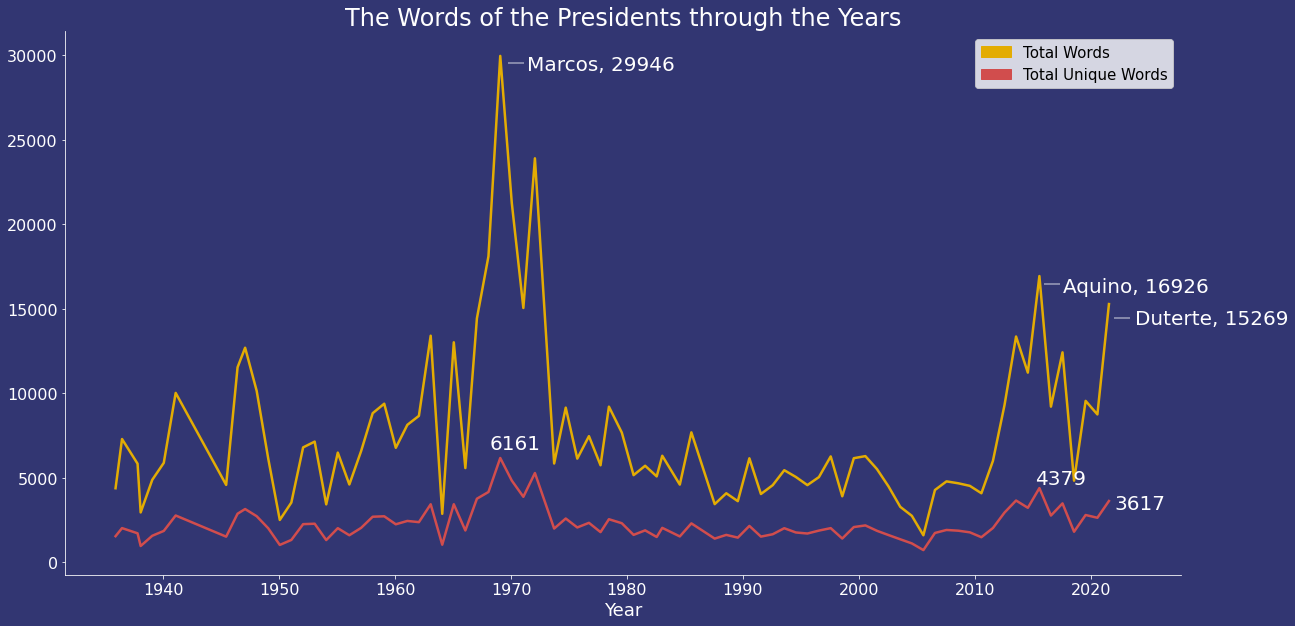

In [3]:
import matplotlib.patches as patches

df = pd.read_csv('cleaned_speeches.csv')

# Obtain counts of wirds
df['chars'] = df['speech'].str.len()
df['words'] = df['speech'].str.split().apply(len)
df['unique_words'] = df['speech'].str.split().apply(set).apply(len)
df['date'] =  pd.to_datetime(df['date'])

# Visualize results
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="date", y="words", 
             color='#e3ac03', linewidth=2.5)
sns.lineplot(data=df, x="date", y="unique_words", 
             color='#d14d4d', linewidth=2.5)
fig = plt.gcf()
fig.patch.set_facecolor('#323672')
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#323672')
patch1 = patches.Patch(color='#e3ac03', label='Total Words')
patch2 = patches.Patch(color='#d14d4d', label='Total Unique Words')
plt.title("The Words of the Presidents through the Years", 
          fontsize=24, color='white')
plt.legend(handles=[patch1, patch2], fontsize=15)

ax.add_patch(
    patches.Rectangle(
        xy=(-100, 29500),
        width=500, height=100, linewidth=1, facecolor="white",
        fill=True, alpha=0.4))
ax.text(500, 29100, 'Marcos, 29946', fontsize = 20, color='white')
ax.text(-690, 6700, '6161', fontsize = 20, color='white')

ax.add_patch(
    patches.Rectangle(
        xy=(16800, 16400),
        width=500, height=100, linewidth=1, facecolor="white",
        fill=True, alpha=0.4))
ax.text(17400, 16000, 'Aquino, 16926', fontsize = 20, color='white')
ax.text(16500, 4600, '4379', fontsize = 20, color='white')

ax.add_patch(
    patches.Rectangle(
        xy=(19000, 14400),
        width=500, height=100, linewidth=1, facecolor="white",
        fill=True, alpha=0.4))
ax.text(19650, 14080, 'Duterte, 15269', fontsize = 20, color='white')
ax.text(19000, 3120, '3617', fontsize = 20, color='white')

plt.show();


<div align="center"> <h3 align="center"> Figure 1. Length of Speech and Size of Vocabulary of SONAs through the Time</h3> </div>

Going through the SONA’s we can see the thousands of words mentioned across all presidents. Ferdinand Marcos gave a speech consisting of almost 30 thousand words, with only 6000 unique words. The next longest SONA would be Benigno Aquino’s in 2015 and Rodrigo Duterte in 2020. Evidently, there are varying ranges of vocabulary that each president has. However, although their vocabularies may be similar in size, the content and context of their speeches vary greatly. This gives us a huge amount of text data to wrangle, analyze, and cluster for insights.

## Analysis of Overall Speech Theme per President

An analysis of the message of each president was also performed by utilizing the output of `TFIDFVectorizer` to identify the most frequent words within the collection of speeches of each president. The outputs were then formated into a pandas DataFrame which was afterwards used in generating the following wordclouds :

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,2,4,6,8,10,12,16,18,20,22,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


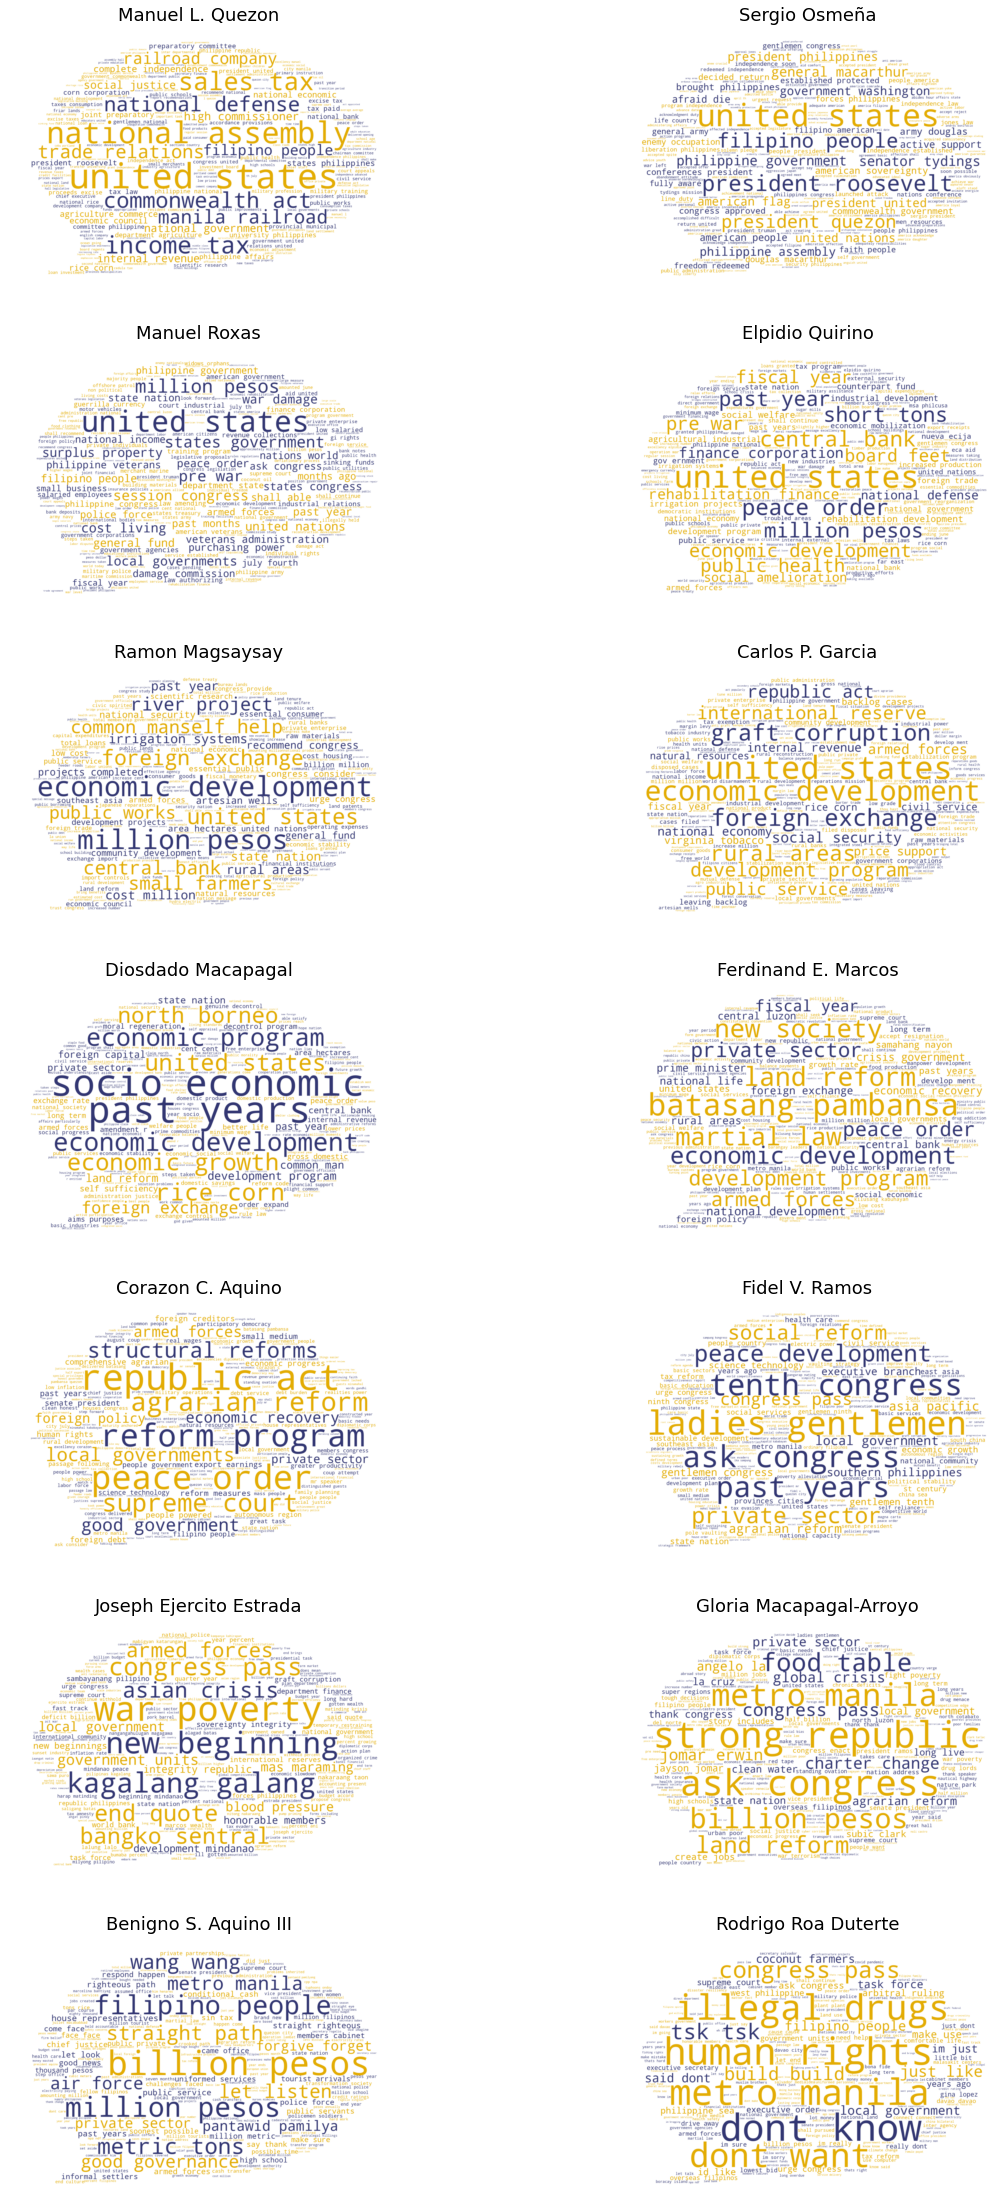

In [4]:
# change the value to black
import matplotlib.colors

df_tfidf = pd.read_csv('tfidf_president.csv')

# Import image to np.array
def plot_cloud():
    mask = np.array(Image.open('comment.png'))

    fig, axs = plt.subplots(7, 2, figsize=(20, 40))
    axs = axs.ravel()
    CustomCmap = matplotlib.colors.ListedColormap(['#323672', '#e3ac03'])

    for i, pres in enumerate(df['president'].unique()):
        df_frequencies = pd.DataFrame({
            'word': df_tfidf['feature'+str(i)],
            'tfidf': df_tfidf['score'+str(i)]
        })

        df_frequencies = df_frequencies.set_index('word')

        wordcloud = WordCloud(background_color="white",
                              min_font_size=5,
                              prefer_horizontal=1,
                              colormap=CustomCmap,
                              mask=mask).generate_from_frequencies(
                                         frequencies=df_frequencies['tfidf'])

        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].set_title(pres, fontsize=18)
        axs[i].axis("off")
    #plt.tight_layout()
    return plt.show()
        
plot_cloud()

<div align="center"> <h3 align="center"> Figure 2. Word Clouds of the Combined SONAs of each President</h3> </div>

In **Manuel L. Quezon**’s 7 SONA speeches, he covered topics relating to Philippine independence from United States along with taxes & trade, infrastructure and national defense.

**Sergio Osmena** had only 1 SONA which covered the Philippine American Relationship.

**Manuel Roxas** had 3 speeches that talk about United States predominantly but also covered topics on his governance, the national budget, and the economy.

**Elpidio Quirino** talked about the United States, economy, budget appropriations, and rehabilitation in his 5 speeches. He also covered topics about social justice, agriculture and foreign trade. 

**Ramon Magsaysay**’ 4 speeches was about a government for the people covering economic development, rural development, and national budget.

**Carlos P. Garcia**’s SONA speeches talked a lot about economic development in his 4 speeches along with foreign trade and government.

**Diosdado Macapagal** had 4 speeches that covered foreign trade and economic development but also talked about governance and land reform along with positive words talking about common good in the nation.

During **Ferdinand E. Marcos** rule, he did 20 speeches that covered topics such as new visions for the Philippines. He also talked about economy, peace and order as well as crisis, recovery, and military. Very unique to his speeches included words like resignation which was apparent during his martial law SONAs which were statements about the different people resigning.

**Corazon C. Aquino** had 5 speeches that covered topics like democracy, reforms, and economic recovery. 

In the 6 SONA speeches by **Fidel V. Ramos**, he was talking about topics on South East Asia trade and industry along with Social Reforms and education.

**Joseph Ejercito Estrada** had 3 speeches that talked about the Asian Crisis and problems in insurgency and also talked about national wealth.

**Gloria Macapagal-Arroyo** strongly talked about the Local government with words like strong republic. She also covered topics about economic progress and challenges like poverty. She had a total of 9 speeches.

**Benigno S. Aquino III** had 6 SONA speeches with topics that represented his thrust on “Kayo ang Boss ko” with words focusing on budgeting, straight path, good governance, and the Filipino people. 

Our current president, **Rodrigo Roa Duterte** has 6 speeches to date. He talks about current Philippine issues such as illegal drugs, corruption, and human rights. His personality are also reflected in his speeches with words like “tsk tsk” and “don’t know”. 


# Results and Discussion

## Unsupervised Clustering

Agglomerative clustering using Ward's method was used to cluster the dimensionality reduced SONAs. Through the use of visual tools such as dendograms, we selected the threshold of `t=1.67` as the the primary basis of the total number of clusters that we chose. A scatter plot using the first two principal components was also used to visualize the clustering as well as to visualize if the clusters were separable and distinct.

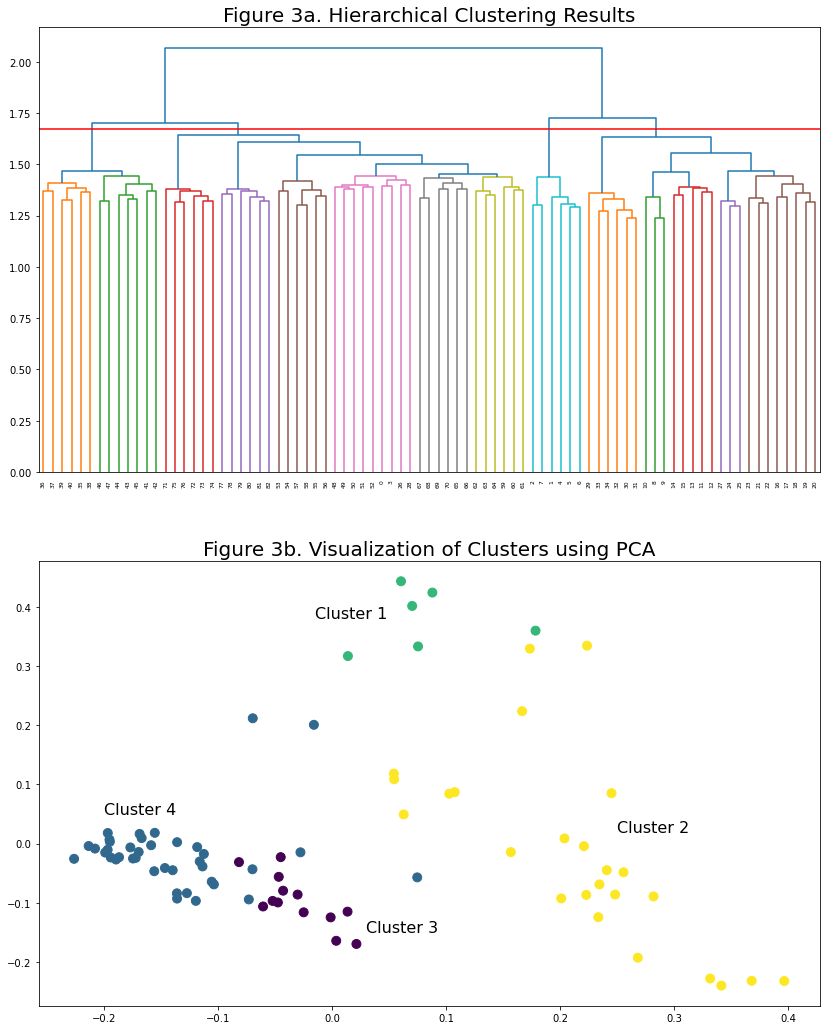

In [5]:
svd_results = pd.read_csv('svd_results_final.csv')

def cluster_visuals(df):
    dist = 1 - cosine_similarity(df.iloc[:, 1:])
    mergings = linkage(dist, method="ward", metric='euclidean')
    Z = linkage(dist, method="ward", optimal_ordering=True)
    y_predict_Z = fcluster(Z, t=1.67, criterion='distance')
    X_res_new = PCA(n_components=2, random_state=1337).fit_transform(dist)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18))

    dendrogram(mergings, p=20, truncate_mode="level", 
               leaf_rotation=90, ax=ax1)
    ax1.axhline(1.67, c='r')
    ax1.set_yticks=100
    ax1.set_title('Figure 3a. Hierarchical Clustering Results', fontsize=20)

    ax2.text(-0.015, 0.38, 'Cluster 1', fontsize = 16)
    ax2.text(0.25, 0.02, 'Cluster 2', fontsize = 16)
    ax2.text(0.03, -0.15, 'Cluster 3', fontsize = 16)
    ax2.text(-0.2, 0.05, 'Cluster 4', fontsize = 16)
    ax2.scatter(X_res_new[:,0], X_res_new[:,1], c=y_predict_Z, s=80)
    ax2.set_title('Figure 3b. Visualization of Clusters using PCA', fontsize=20);
    return y_predict_Z, plt.show();
    
y_predict_Z, plot = cluster_visuals(svd_results)
plot

<div align="center"> <h3 align="center"> Figure 3. Results of Agglomerative Clustering</h3> </div>

**(Bottom)** This figure is a visual representation of the heirarchy of clusters that was generated through agglomerative clustering through Ward's method. Visually, the clusters are distinct from each other whereas the threshold at `t=1.67` distinguished these clusters into 4 thematic clusters. **(Top)** This figure serves as a visual tool that plots the points of 4 thematic clusters we derived from the prior figure. Note that as this is only a representation of the clusters through their first two principal components, the overlaps of some clusters may not show how how separable each cluster is from one another. 

Four clusters were obtained, each with a corresponding field namely: the Commonwealth Cluster, the Developing Republic Cluster, the Martial Law Cluster, and the Economy Cluster.

<img src="wc_commonweath.jpg" width=600 height=600 />
<div align="center"> <h4 align="center"> “Commonwealth Cluster”</h4> </div>

In [6]:
clusters = pd.concat([svd_results.iloc[:, 0], pd.DataFrame(y_predict_Z)], axis=1)
clusters.columns = ['SONA', 'Cluster']
clusters[clusters['Cluster']==3]['SONA'].to_frame()

,SONA
1,"Manuel L. Quezon-June 16, 1936"
2,"Manuel L. Quezon-October 18, 1937"
4,"Manuel L. Quezon-January 24, 1939"
5,"Manuel L. Quezon-January 22, 1940"
6,"Manuel L. Quezon-January 31, 1941"
7,"Sergio Osmeña-June 9, 1945"


The **Commonwealth Cluster** contains 6 SONAs from Manuel Quezon and Sergio Osmena. The Commonwealth refers to the government prior to the establishment of the Philippine republic. Features in this cluster that stand out are: commonwealth act and national assembly. The National Assembly was the first national legislative body fully chosen by election and the Commonwealth Acts were the laws promulgated during this period of the American colonization. 
These artifacts along with the other themes reflect our history as a US Territory and the nation’s first steps to become independent 


<img src="wc_developing.jpg" width=600 height=600 />
<div align="center"> <h4 align="center"> “Developing Republic Cluster”</h4> </div>

In [7]:
clusters = pd.concat([svd_results.iloc[:, 0], pd.DataFrame(y_predict_Z)], axis=1)
clusters.columns = ['SONA', 'Cluster']
clusters[clusters['Cluster']==4]['SONA'].to_frame()

,SONA
8,"Manuel Roxas-June 3, 1946"
9,"Manuel Roxas-January 27, 1947"
10,"Manuel Roxas-January 26, 1948"
11,"Elpidio Quirino-January 24, 1949"
12,"Elpidio Quirino-January 23, 1950"
13,"Elpidio Quirino-January 22, 1951"
14,"Elpidio Quirino-January 28, 1952"
15,"Elpidio Quirino-January 26, 1953"
16,"Ramon Magsaysay-January 25, 1954"
17,"Ramon Magsaysay-January 24, 1955"


The **Developing Republic Cluster** contains 25 SONAs from Manual Roxas, Elpidio Quirino, Ramon Magsaysay, Carlos Garcia, Diosdado Macapagal, and Ferdinand Marcos. Prominent features from this cluster include united state, economic development, land reform, armed force, and trade zone hence the theme of development. During this time, the US had slowly relinquished its sovereignty over the Philippines, and the nation began to build itself up as an independent nation. We see progress through the Filipino First Policy and Agricultural Land Reform Code.


<img src="wc_ml.jpg" width=600 height=600 />
<div align="center"> <h4 align="center"> “Martial Law Cluster”</h4> </div>

In [8]:
clusters = pd.concat([svd_results.iloc[:, 0], pd.DataFrame(y_predict_Z)], axis=1)
clusters.columns = ['SONA', 'Cluster']
clusters[clusters['Cluster']==1]['SONA'].to_frame()

,SONA
35,"Ferdinand E. Marcos-September 21, 1973"
36,"Ferdinand E. Marcos-September 21, 1974"
37,"Ferdinand E. Marcos-September 19, 1975"
38,"Ferdinand E. Marcos-September 21, 1976"
39,"Ferdinand E. Marcos-September 21, 1977"
40,"Ferdinand E. Marcos-June 12, 1978"
41,"Ferdinand E. Marcos-July 23, 1979"
42,"Ferdinand E. Marcos-July 28, 1980"
43,"Ferdinand E. Marcos-July 27, 1981"
44,"Ferdinand E. Marcos-July 26, 1982"


Next is the **Martial Law Cluster**. This cluster contains 14 SONAs all from just one president: Ferdinand Marcos. This cluster contains the features of batasang pambansa, martial law, new society, crisis government, samahang nayon, drug addiction, and moral revolution. The theme for this is New Society. These features highlight the rhetoric that Ferdinard Marcos adopted for his actions and decisions during his presidency. His emphasis on stability made him popular during his early term. And his eventual justification of martial law as a means of national security led to a dictatorship lasting around 10 years.


<img src="wc_economy.jpg" width=600 height=600 />
<div align="center"> <h4 align="center"> “Economy-Focused Cluster”</h4> </div>

In [21]:
clusters = pd.concat([svd_results.iloc[:, 0], pd.DataFrame(y_predict_Z)], axis=1)
clusters.columns = ['SONA', 'Cluster']

In [34]:
clusters.T

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
SONA,"Manuel L. Quezon-November 25, 1935","Manuel L. Quezon-June 16, 1936","Manuel L. Quezon-October 18, 1937","Manuel L. Quezon-January 24, 1938","Manuel L. Quezon-January 24, 1939","Manuel L. Quezon-January 22, 1940","Manuel L. Quezon-January 31, 1941","Sergio Osmeña-June 9, 1945","Manuel Roxas-June 3, 1946","Manuel Roxas-January 27, 1947",...,"Benigno S. Aquino III-July 23, 2012","Benigno S. Aquino III-July 22, 2013","Benigno S. Aquino III-July 28, 2014","Benigno S. Aquino III-July 27, 2015","Rodrigo Roa Duterte-July 25, 2016","Rodrigo Roa Duterte-July 24, 2017","Rodrigo Roa Duterte-July 23, 2018","Rodrigo Roa Duterte-July 22, 2019","Rodrigo Roa Duterte-July 27, 2020","Rodrigo Roa Duterte-July 26, 2021"
Cluster,2,3,3,2,3,3,3,3,4,4,...,2,2,2,2,2,2,2,2,2,2


In [9]:
clusters = pd.concat([svd_results.iloc[:, 0], pd.DataFrame(y_predict_Z)], axis=1)
clusters.columns = ['SONA', 'Cluster']
clusters[clusters['Cluster']==2]['SONA'].to_frame()

,SONA
0,"Manuel L. Quezon-November 25, 1935"
3,"Manuel L. Quezon-January 24, 1938"
26,"Diosdado Macapagal-January 27, 1964"
28,"Ferdinand E. Marcos-January 24, 1966"
48,"Corazon C. Aquino-July 27, 1987"
49,"Corazon C. Aquino-July 25, 1988"
50,"Corazon C. Aquino-July 24, 1989"
51,"Corazon C. Aquino-July 23, 1990"
52,"Corazon C. Aquino-July 22, 1991"
53,"Fidel V. Ramos-July 27, 1992"


The last cluster is the **Economy-focused cluster**. This cluster contains 39 SONAs from Manuel Quezon, Diosdado Macapagal, Ferdinand Marcos, Corazon Aquino, Fidel Ramos, Gloria Arroyo, Joseph Estrada, Benigno Aquino, and Rodrigo Duterte. While most of these SONAs come from post-martial law presidents, 2 are from Manuel Quezon, 1 is from Macapagal, and 1 from Marcos stand out. The reason for this is that the SONAs contain features such as billion pesos, ask congress, and metro manila. Economy, budget, and taxes were the main topics heavily covered by those particular SONAs during those years.


# Conclusion

This study has shown that the main differentiator for the clusters is the time element. The speeches have been clustered into what the group labels as the **Commonwealth Cluster**, the **Developing Republic Cluster**, the **Martial Law Cluster** and the **Economy-Focused Cluster**. These clusters roughly correspond to the time when the presidents assumed office.

A secondary and less obvious differentiator is the topic of the SONA. The SONA have for the most part addressed the pressing problems of that time. Benigno Aquino talked about wang-wang. Gloria Macapagal Arroyo talked about agrarian reform. Manuel Quezon talked about Tydings McDuffy. Ferdinand Marcos talked about his new Society and discipline.
These are examples of how the presidents used the SONA to talk about their focus and thrusts. 

The study has also shown the potential to analyze the priorities and platforms of the presidents. Ferdinand Marcos, who served as president for the longest period of 21 years, showed three distinct personas in his clusters. Prior to Martial Law, Ferdinand Marcos talked about economic and infrastructure growth. In the “Martial Law Cluster”, Ferdinand Marcos talked about the New Society, and discipline. Post Martial Law, some of the speeches of Ferdinand Marcos had no discernible theme.

Manuel L Quezon once said,
"We shall build a government that will be just, honest, efficient, and strong so that the foundations of the coming Republic may be firm and enduring – a government, indeed, that must satisfy not only the passing needs of the hour but also the exacting demands of the future."

Using this study, we learn what our presidents talked about and what was important for them. We can “hear” them without distractions.  We can use this knowledge to measure the presidents against our own moral compasses. We will know who rose to the occasion and who were found wanting.

It is now our duty as citizens of this nation to listen to our past presidents, learn from them and be inspired to vote for competent and capable leaders who will do the right thing for our country in May 2022.


# Recommendations
We have shown how data science can help us analyze what our presidents have been saying throughout the years. This study can be extended in a number of ways.

One extension to this study is to include the other speeches of the Presidents aside from their State of the Nation Addresses. This additional analysis would provide a better gauge of the priorities and platforms of the presidents. The State of the Nation Address happens only once a year and therefore does not provide as many speeches as possible. 

In addition, more speeches of the presidents could be analyzed with a time element as a dimension. This could be used to validate whether topics that are popular decrease or increase over time.

Another natural progression of this study would be to analyze what our local leaders, our governors and mayors, have been prioritizing in terms of their platforms and programs.This study would be more relevant since local leaders are closer to Filipinos and affect us in more personal ways.


# References

[1] State of the Nation Addresses | GOVPH. (n.d.). Official Gazette of the Republic of the Philippines. Retrieved September 16, 2021, from https://www.officialgazette.gov.ph/past-sona-speeches/ 

[2] Quezon, M. L. (1935, November 5). Message to the First Assembly on National Defense. Official Gazette. https://www.officialgazette.gov.ph/1935/11/15/inaugural-address-of-president-quezon-november-15-1935/